<a href="https://colab.research.google.com/github/HARDIK-IS-SHARMA/Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Applied_Statistics_Project_almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm , poisson,skewnorm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Dataset Loading

In [ ]:
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


#Basic Info about Coloumn

In [ ]:
df.shape

(2240, 22)

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

#Coloumn Description #

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

###Describing for getting stastical values

In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


###Duplicates Value

In [ ]:
df.duplicated().sum()

0

###Finding Missing Values if any

In [ ]:
missing_value = df.isnull().sum()
print(missing_value)
#There are 24 missing value in the Income coloumn

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


In [ ]:
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

### As we can see that income coloumn has some null values , so we gonna fill that with the mean of all the data of the income column , also Dt_customer has date filled in it but the data type is object so we gonna change its data type to dateandtime ###

###DATA WRANGLING

In [ ]:
#Calculating the Mean of income coloum
income_mean = df['Income'].mean()

#filling the value of mean in the null values of income column
df['Income'].fillna(income_mean,inplace=True)


In [ ]:
#converting it to date and time
df['Dt_Customer'] =  pd.to_datetime(df['Dt_Customer'], errors='coerce')

## Convert 'dt_custome' to datetime, errors='coerce' will replace invalid data with NaT

In [ ]:
#Now REmoving rows which contain "#######" values

df = df.dropna(subset=['Dt_Customer'])

# Drop rows where 'dt_custome' is NaT

In [ ]:
df.dtypes

#Now our ALL the Colum are in perfect DataTypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

##Demographic Distribution

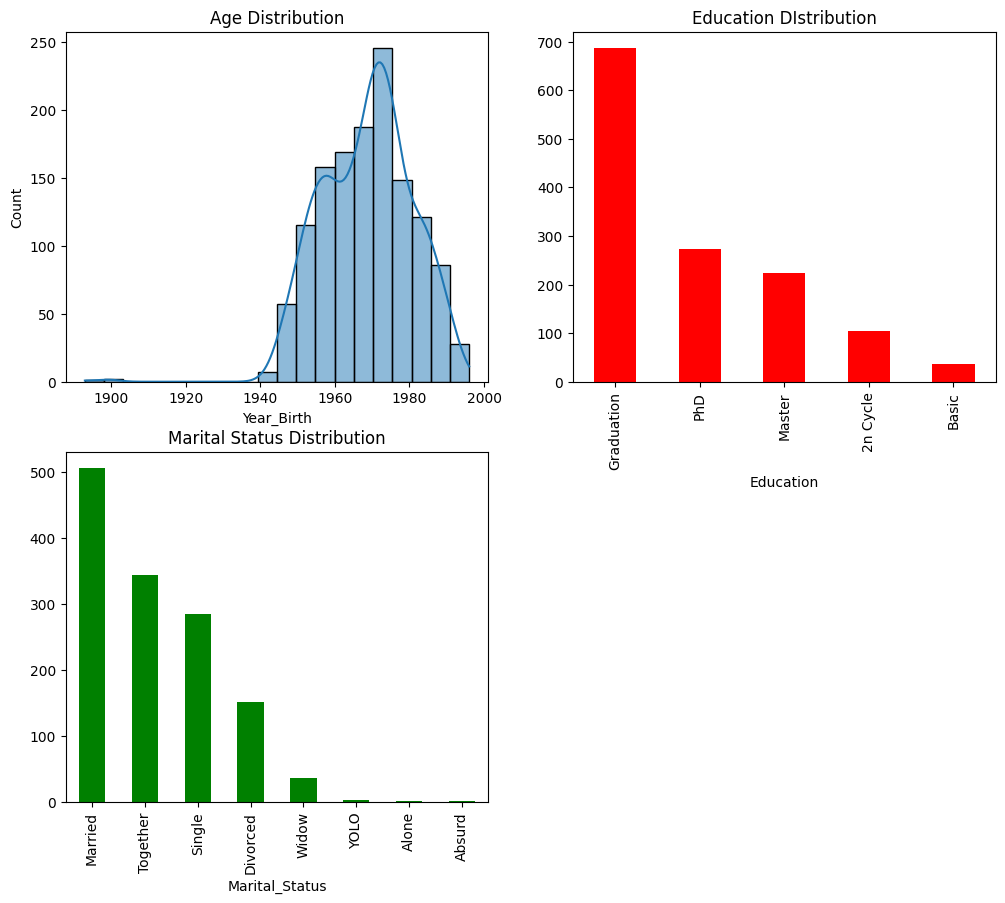

In [ ]:
plt.figure(figsize=(12,10))

#Age distribution
plt.subplot(2,2,1)
sns.histplot(df['Year_Birth'],bins=20,kde=True)
plt.title("Age Distribution")

#Education DIstribution

plt.subplot(2,2,2)
df['Education'].value_counts().plot(kind='bar',color='r')
plt.title('Education DIstribution')

#Marital Status Distribution

plt.subplot(2,2,3)
df['Marital_Status'].value_counts().plot(kind='bar',color='g')
plt.title('Marital Status Distribution')

plt.show()

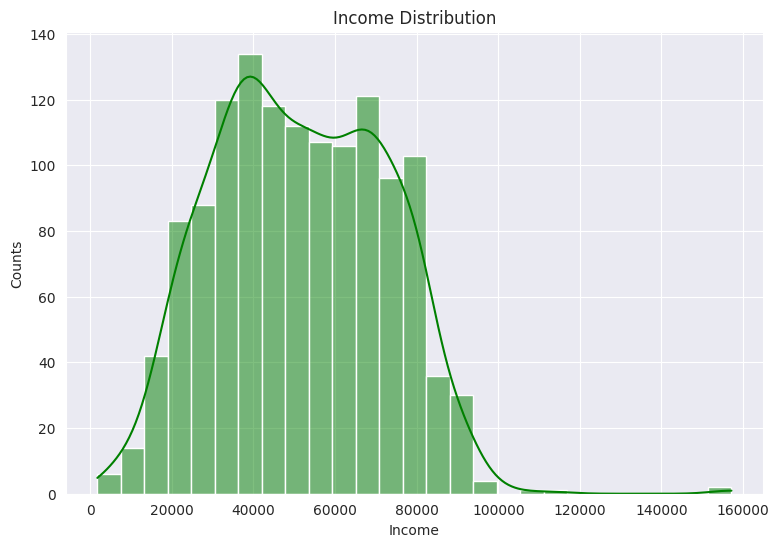

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
#giving size
plt.figure(figsize=(9,6))

# Set the style for the plot
sns.set_style('darkgrid')

#Ploting Income DIStribution
sns.histplot(df['Income'],kde=True,color='green')
plt.title('Income Distribution')
plt.xlabel("Income")
plt.ylabel("Counts")
plt.show()

In [ ]:
#Calculate the Z-scores of Income
Z_scores = np.abs((df['Income'] - df['Income'].mean()) / df['Income'].std())

#setting the Thresold limit
thresold = 3

#Outlier
outlier = df[Z_scores > thresold]

#Removing the Outlier
df = df[Z_scores <= thresold]

In [ ]:
#Calculate the Z-scores of YEar_birth
Z_scores_age = np.abs((df['Year_Birth'] - df['Year_Birth'].mean()) / df['Year_Birth'].std())

#setting the Thresold limit
thresold_age = 3

#Outlier
outlier = df[Z_scores_age > thresold_age]

#Removing the Outlier
df = df[Z_scores_age <= thresold_age]

In [ ]:
# REmove unvaluable Rows from marital coloum
unexpected_value = ['YOLO', 'Absurd', 'Alone']

df = df[~df['Marital_Status'].isin(unexpected_value)] # ~ this operator return all the true value to false and false value to true

print(df['Marital_Status'].unique())  #Gives unique values


['Divorced' 'Single' 'Married' 'Together' 'Widow']


### The values 'YOLO', 'Absurd', and 'Alone' in the 'Marital_Status' column were identified as outliers or inconsistent entries during data exploration. As these values do not align with valid marital status categories , they have been removed to ensure the accuracy and reliability of the dataset for subsequent analyses. ###

In [ ]:
#now we gonna add a colomn name total_spending in main dataframe  at last which remain the sum of all the spending colomn

df['total_spending'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [ ]:
#Look of the colomn

df.iloc[ 0:,-1: ]

,total_spending
0,1190
1,577
2,251
5,1192
6,1215
...,...
2229,34
2230,34
2234,734
2236,55


In [ ]:
df.sample(2)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,total_spending
29,9687,1975,Graduation,Single,73170.0,0,0,2014-05-31,1,184,...,30,32,1,5,4,6,2,0,0,726
1682,3855,1963,Graduation,Married,22419.0,0,0,2013-04-18,74,30,...,21,42,1,3,2,2,8,0,0,162


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 0 to 2238
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   1315 non-null   int64         
 1   Year_Birth           1315 non-null   int64         
 2   Education            1315 non-null   object        
 3   Marital_Status       1315 non-null   object        
 4   Income               1315 non-null   float64       
 5   Kidhome              1315 non-null   int64         
 6   Teenhome             1315 non-null   int64         
 7   Dt_Customer          1315 non-null   datetime64[ns]
 8   Recency              1315 non-null   int64         
 9   MntWines             1315 non-null   int64         
 10  MntFruits            1315 non-null   int64         
 11  MntMeatProducts      1315 non-null   int64         
 12  MntFishProducts      1315 non-null   int64         
 13  MntSweetProducts     1315 non-null   i

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# Extract relevant columns
Key_Variables_1 = df[['Income','Recency','total_spending']]

#Storing all The value in the Dictionary:

statistic_colomn_1 = {

    "Variable":Key_Variables_1.columns.tolist(),
    "Mean": Key_Variables_1.mean().tolist(),
    "Median": Key_Variables_1.median().tolist(),
    "Std Deviation" : Key_Variables_1.std().tolist(),
     "Variance" : Key_Variables_1.var().tolist()
}

df_stats_1 = pd.DataFrame(statistic_colomn_1)

#Genaral Statistics of these columns
print("General Stats - 1st :")
df_stats_1


General Stats - 1st :


,Variable,Mean,Median,Std Deviation,Variance
0,Income,51252.639747,50664.0,20474.286760,4.191964e+08
1,Recency,49.414449,50.0,28.776406,8.280815e+02
2,total_spending,596.736882,358.0,600.288208,3.603459e+05


In [ ]:
#Describing the Key_varible TO find the Stastical values

Key_Variables_1.describe()

,Income,Recency,total_spending
count,1315.000000,1315.000000,1315.000000
mean,51252.639747,49.414449,596.736882
std,20474.286760,28.776406,600.288208
min,1730.000000,0.000000,5.000000
25%,35661.500000,25.000000,67.000000
50%,50664.000000,50.000000,358.000000
75%,68001.500000,74.000000,1034.000000
max,113734.000000,99.000000,2525.000000


In [ ]:
#Calculating the Mode
Key_Variables_1.mode().transpose()

,0,1
Income,52247.251354,NaN
Recency,65.000000,NaN
total_spending,22.000000,46.0


In [ ]:
# Extract relevant columns
temp_df_2 = df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

#Storing all The value in the Dictionary:
statistic_colomn_2 = {

    "Variable":temp_df_2.columns.tolist(),
    "Mean": temp_df_2.mean().tolist(),
    "Median": temp_df_2.median().tolist(),
    "Std Deviation" : temp_df_2.std().tolist(),
     "Variance" : temp_df_2.var().tolist()
}

#COnverting it to DataFrame:
df_stats_2 = pd.DataFrame(statistic_colomn_2)

#Amount spend Statistics of these columns
print("Amount spend Statistics:")
df_stats_2

Amount spend Statistics:


,Variable,Mean,Median,Std Deviation,Variance
0,MntWines,302.577947,171.0,338.800515,114785.789011
1,MntFruits,25.193916,7.0,38.484352,1481.045321
2,MntMeatProducts,161.359696,66.0,215.182749,46303.615574
3,MntFishProducts,36.473004,11.0,54.313298,2949.934392
4,MntSweetProducts,27.180989,8.0,41.579241,1728.833276
5,MntGoldProds,43.951331,24.0,52.384793,2744.166579


In [ ]:
#Finding mode of 2nd key variable which is TOtal amount spend of each items:

temp_df_2.mode().transpose()

,0
MntWines,2
MntFruits,0
MntMeatProducts,11
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,3


In [ ]:
# Extract relevant columns
temp_df_3 = df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]]

#Storing all The value in the Dictionary:
statistic_colomn_3 = {

    "Variable":temp_df_3.columns.tolist(),
    "Mean": temp_df_3.mean().tolist(),
    "Median": temp_df_3.median().tolist(),
    "Std Deviation" : temp_df_3.std().tolist(),
     "Variance" : temp_df_3.var().tolist()
}

#COnverting it to DataFrame:
df_stats_3 = pd.DataFrame(statistic_colomn_3)

#Purchase Quantity Statistics of these columns
print("Purchase Quantity Statistics:")
df_stats_3

Purchase Quantity Statistics:


,Variable,Mean,Median,Std Deviation,Variance
0,NumDealsPurchases,2.329278,2.0,1.916527,3.673077
1,NumWebPurchases,4.100380,4.0,2.774469,7.697679
2,NumCatalogPurchases,2.570342,1.0,2.743505,7.526821
3,NumStorePurchases,5.802281,5.0,3.268385,10.682339
4,NumWebVisitsMonth,5.421293,6.0,2.428365,5.896959


In [ ]:
#Finding mode of 3rd key variable which is Purchase Quantity

temp_df_3.mode().transpose()


,0,1
NumDealsPurchases,1.0,NaN
NumWebPurchases,1.0,3.0
NumCatalogPurchases,0.0,NaN
NumStorePurchases,3.0,NaN
NumWebVisitsMonth,7.0,NaN


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

###Variables Identifications ▶

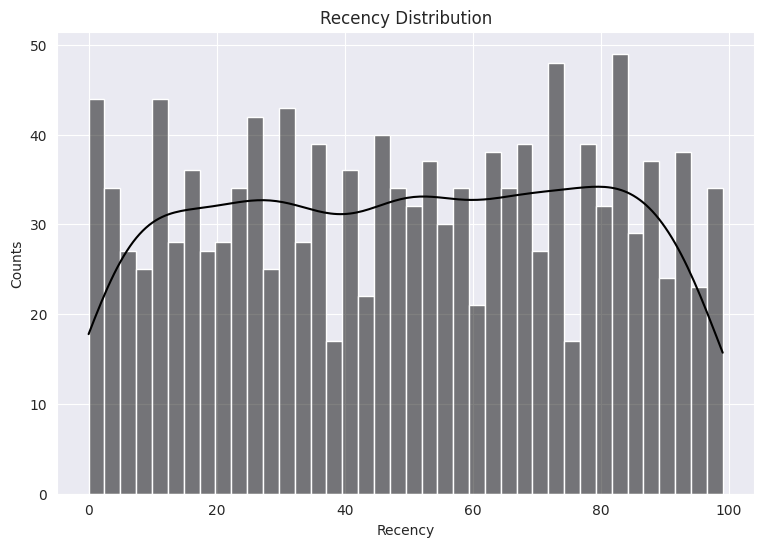

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#giving size
plt.figure(figsize=(9,6))

# Set the style for the plot
sns.set_style('darkgrid')

#Ploting Recency DIStribution
sns.histplot(df['Recency'],bins=40,kde=True,color='black')
plt.title('Recency Distribution')
plt.xlabel("Recency")
plt.ylabel("Counts")

#Showing the plot
plt.show()

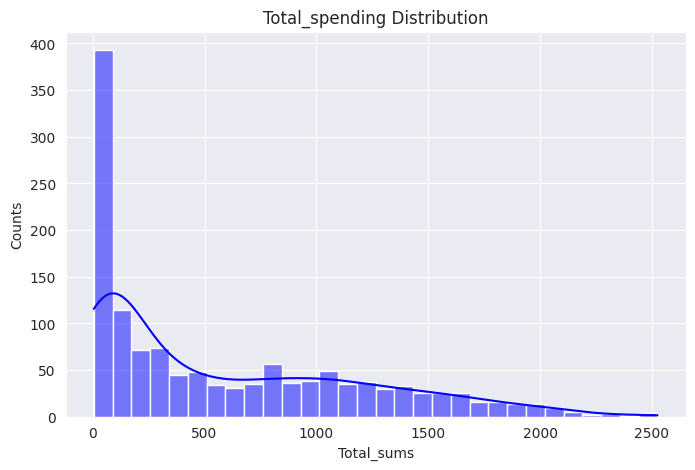

In [ ]:
#Specifying the size of graph
plt.figure(figsize=(8,5))

#Ploting total_spendings DIStribution
sns.histplot(df['total_spending'],bins=30,kde=True,color='blue')
plt.title('Total_spending Distribution')
plt.xlabel("Total_sums")
plt.ylabel("Counts")

#Showing the plot
plt.show()

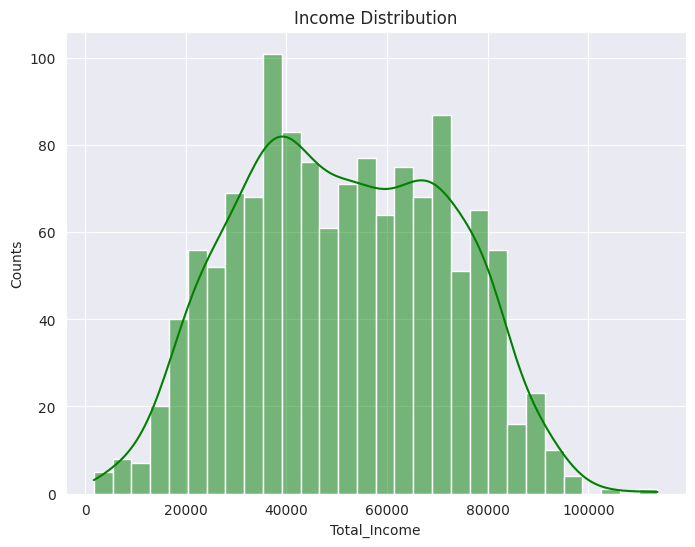

In [ ]:
#Specifying the size of graph
plt.figure(figsize=(8,6))

#Ploting total_Income DIStribution
sns.histplot(df['Income'],bins=30,kde=True,color='green')
plt.title('Income Distribution')
plt.xlabel("Total_Income")
plt.ylabel("Counts")

#Showing the plot
plt.show()

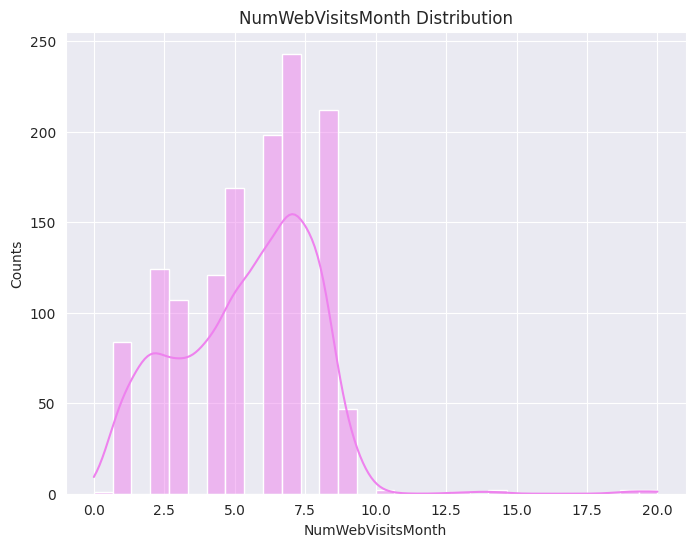

In [ ]:
#Specifying the size of graph
plt.figure(figsize=(8,6))

#Ploting total_NumWebVisitsMonth DIStribution
sns.histplot(df['NumWebVisitsMonth'],bins=30,kde=True,color='violet')
plt.title('NumWebVisitsMonth Distribution')
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("Counts")

#Showing the plot
plt.show()

##Assigning Variable and Calculating the Probabilities and Expected values

In [ ]:
#Taking Recency , Income , TotalSpending , Numwebvisitsmonth the data as an example for finding the types of distribution

recency_data = df['Recency']
income_data = df['Income']
Totalspendings_data = df['total_spending']
webvisits_data = df['NumWebVisitsMonth']

#Finding out the Distribution of suitable probability distributions

#NORMAL DISTRIBUTION - (Recency Distribution)
recency_data = norm

#SKEW-NORMAL DISTRIBUTIONS - (total_spending)

Totalspendings_data = skewnorm

#NORMAL DISTRIBUTION - (Income)

Income_data = norm

#SKEW-NORMAL DISTRIBUTIONS - ('NumWebVisitsMonth')

webvisits_data = skewnorm

In [ ]:
## 1. CALCULATING FOR THE [RECENCY DISTRIBUTION]
recency_data = df['Recency']

#calculating Mean
recency_mean = recency_data.mean()

#Calculating standard deviation
recency_std = recency_data.std()

#Calculating the probability
recency_prob = norm.pdf(recency_data,recency_mean,recency_std)

#Calculating expected value
recency_expected_value = recency_data.mean() #ASSUMING EXPECTED VALUE TO BE NEARLY EQUAL TO THE MEAN

print("RECENCY DISTRIBUTION :-")

print("STANDARD DEVIATION OF RECENCY:-",recency_std)

print("PROBABILITY OF RECENCY DATA:-",recency_prob)

print("EXPECTED VALUE FOR RECENCY DATA:-",recency_expected_value)



RECENCY DISTRIBUTION :-
STANDARD DEVIATION OF RECENCY:- 28.776405721300552
PROBABILITY OF RECENCY DATA:- [0.0031737 0.0031737 0.0031737 ... 0.0031414 0.0031414 0.0031414]
EXPECTED VALUE FOR RECENCY DATA:- 49.41444866920152


In [ ]:
## 2. CALCULATING FOR THE [Income Data ]
income_data = df['Income']
#calculating Mean
Income_mean = income_data.mean()

#Calculating standard deviation
Income_std = income_data.std()

#Calculating the probability
Income_prob = norm.pdf(income_data,Income_mean,Income_std)

#Calculating expected value
Income_expected_value = income_data.mean() #ASSUMING EXPECTED VALUE TO BE NEARLY EQUAL TO THE MEAN

print("Income Data DISTRIBUTION :-")

print("STANDARD DEVIATION OF Income:-",Income_std)

print("PROBABILITY OF Income DATA:-",Income_prob)

print("EXPECTED VALUE FOR Income DATA:-",Income_expected_value)

Income Data DISTRIBUTION :-
STANDARD DEVIATION OF Income:- 20474.286759676444
PROBABILITY OF Income DATA:- [5.07579963e-06 1.87087262e-05 1.43500364e-05 ... 7.82923310e-06
 1.19785287e-05 1.51283258e-05]
EXPECTED VALUE FOR Income DATA:- 51252.63974722379


In [ ]:
## 3. CALCULATING FOR THE [Total-Spending Data ]
Totalspendings_data = df['total_spending']

#calculating Mean
Totalspendings_mean = Totalspendings_data.mean()

#Calculating skewness
Totalspendings_skew = Totalspendings_data.skew()

#Calculating the probability
Totalspendings_prob = skewnorm.pdf(Totalspendings_data,Totalspendings_skew)

#Calculating expected value
Totalspendings_expected_value = Totalspendings_data.mean() #ASSUMING EXPECTED VALUE TO BE NEARLY EQUAL TO THE MEAN

print("Total-Spending Data DISTRIBUTION :-")

print("Skewness  OF Total Spendings:-",Totalspendings_skew)

print("PROBABILITY OF Total Spendings:-",Totalspendings_prob)

print("EXPECTED VALUE FOR Total Spendings:-",Totalspendings_expected_value)

Total-Spending Data DISTRIBUTION :-
Skewness  OF Total Spendings:- 0.895750023330069
PROBABILITY OF Total Spendings:- [0. 0. 0. ... 0. 0. 0.]
EXPECTED VALUE FOR Total Spendings:- 596.7368821292775


In [ ]:
## 4. CALCULATING FOR THE [Number of webvisits Data ]
webvisits_data = df['NumWebVisitsMonth']

#calculating Mean
webvisits_mean = webvisits_data.mean()

#Calculating skewness
webvisits_skew = webvisits_data.skew()

#Calculating the probability
webvisits_prob = skewnorm.pdf(webvisits_data,webvisits_skew)

#Calculating expected value
webvisits_expected_value = webvisits_data.mean() #ASSUMING EXPECTED VALUE TO BE NEARLY EQUAL TO THE MEAN

print("Number of webvisits Data DISTRIBUTION :-")

print("Skewness  OF Num of Webvisits Data:-",webvisits_skew)

print("PROBABILITY OF webvisits:-",webvisits_prob)

print("EXPECTED VALUE FOR webvisits:-",webvisits_expected_value)

Number of webvisits Data DISTRIBUTION :-
Skewness  OF Num of Webvisits Data:- 0.29883075234071427
PROBABILITY OF webvisits:- [2.98817104e-01 2.77253054e-06 7.82833480e-02 ... 2.36617078e-04
 1.00195692e-14 7.22395761e-03]
EXPECTED VALUE FOR webvisits:- 5.421292775665399


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:

# Calculate Age
from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']


# Select relevant columns for segmentation
segmentation_data = df[['Age', 'Income', 'Recency', 'Total_Spending', 'NumWebPurchases']]


# Inspect data distributions
sns.pairplot(segmentation_data)
plt.show()

[]

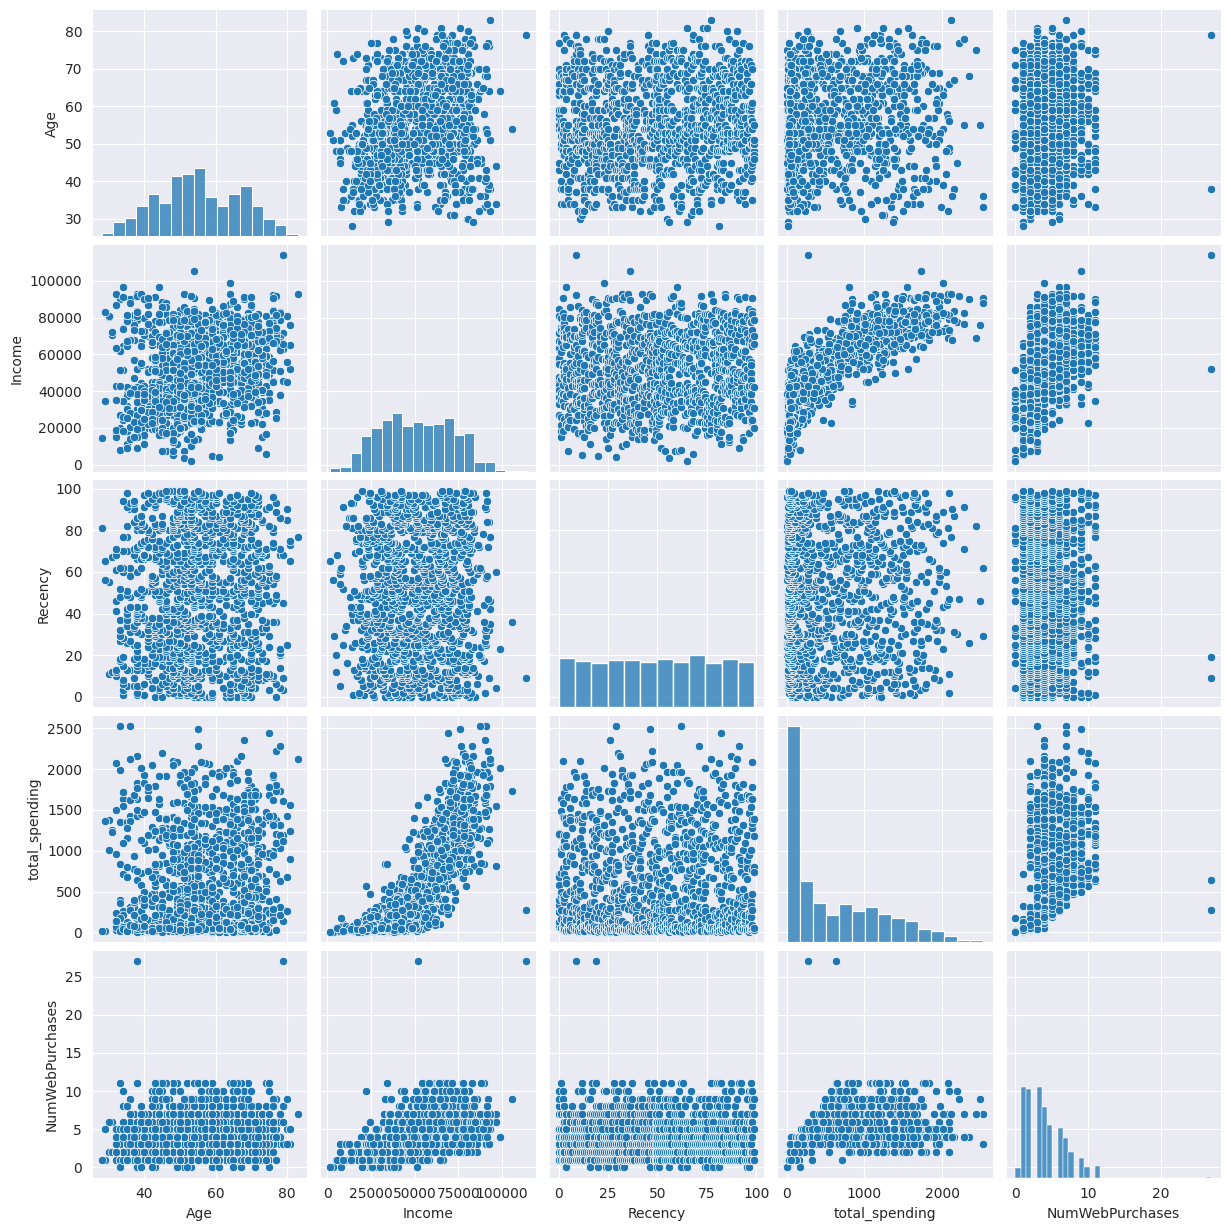

In [ ]:
#Calculating The age of all the persons:

from datetime import datetime
current_date_time = datetime.now().year
df['Age'] = current_date_time - df['Year_Birth']

#Selecting the relevant column:

temp_segmentation = df[['Age', 'Income', 'Recency', 'total_spending', 'NumWebPurchases']]

#ploting Pair Plot between them to find the RElation with each of those column

sns.pairplot(temp_segmentation)
plt.plot()

In [ ]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp_segmentation)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

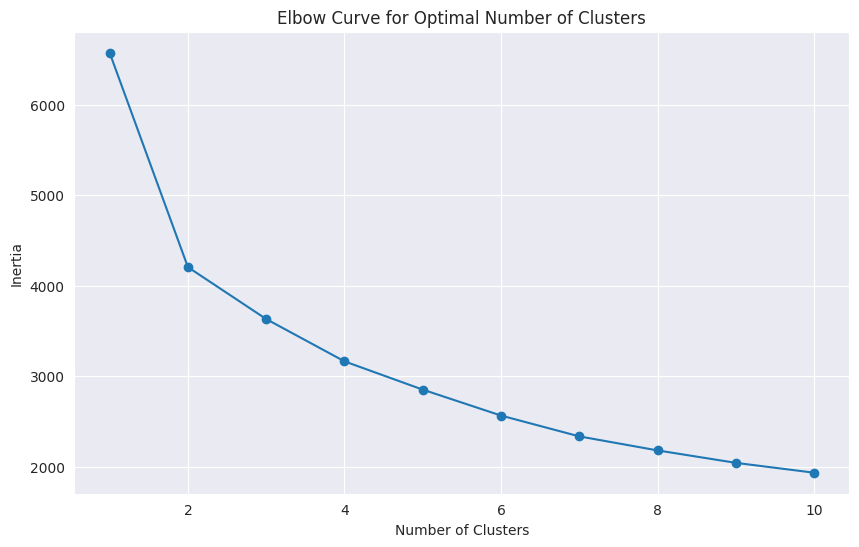

In [ ]:

# Determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(scaled_data)
    inertia.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


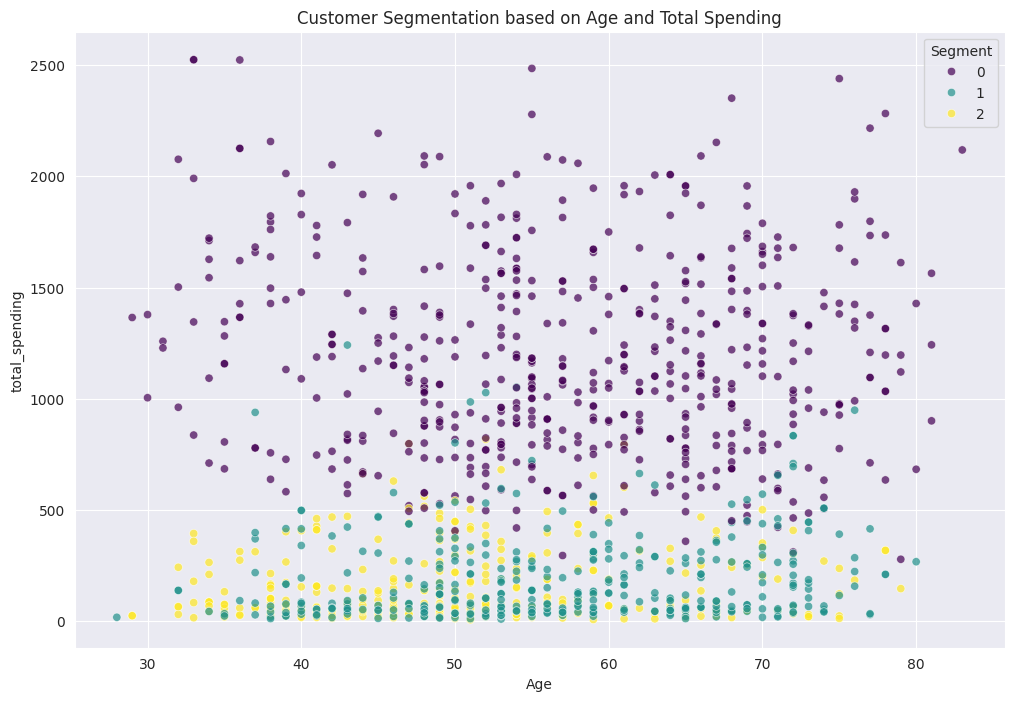

In [ ]:

# Based on the elbow curve, optimal number of clusters:
optimal_clusters = 3

# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans_model.fit_predict(scaled_data)

# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='total_spending', hue='Segment', data=df, palette='viridis', alpha=0.7)
plt.title('Customer Segmentation based on Age and Total Spending')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

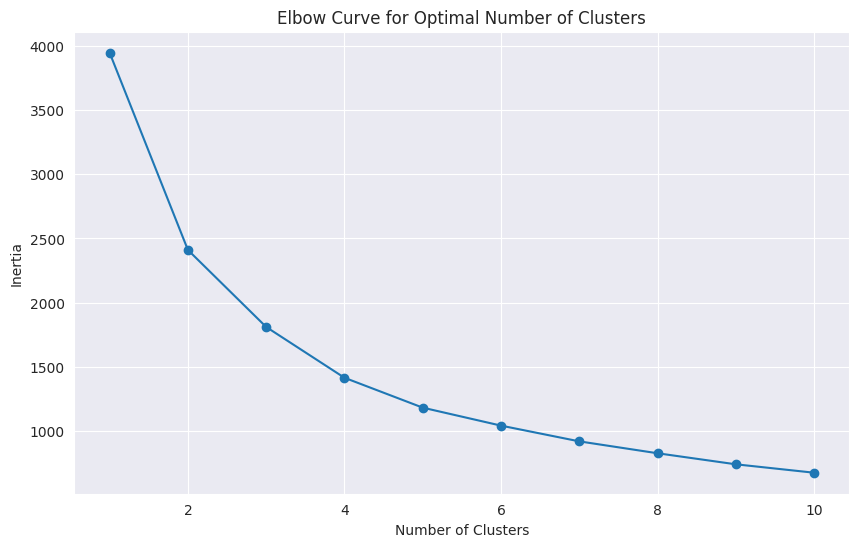

In [ ]:
# Select different combinations of features
feature_combinations = [
    ['Recency', 'total_spending', 'NumWebPurchases'],
    # Add more combinations as needed
]

for features in feature_combinations:
    # Select relevant columns for segmentation
    segmentation_data = df[features]

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(segmentation_data)

    # Determine the optimal number of clusters
    inertia = []
    for i in range(1, 11):
        kmeans_model = KMeans(n_clusters=i, random_state=42)
        kmeans_model.fit(scaled_data)
        inertia.append(kmeans_model.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Curve for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


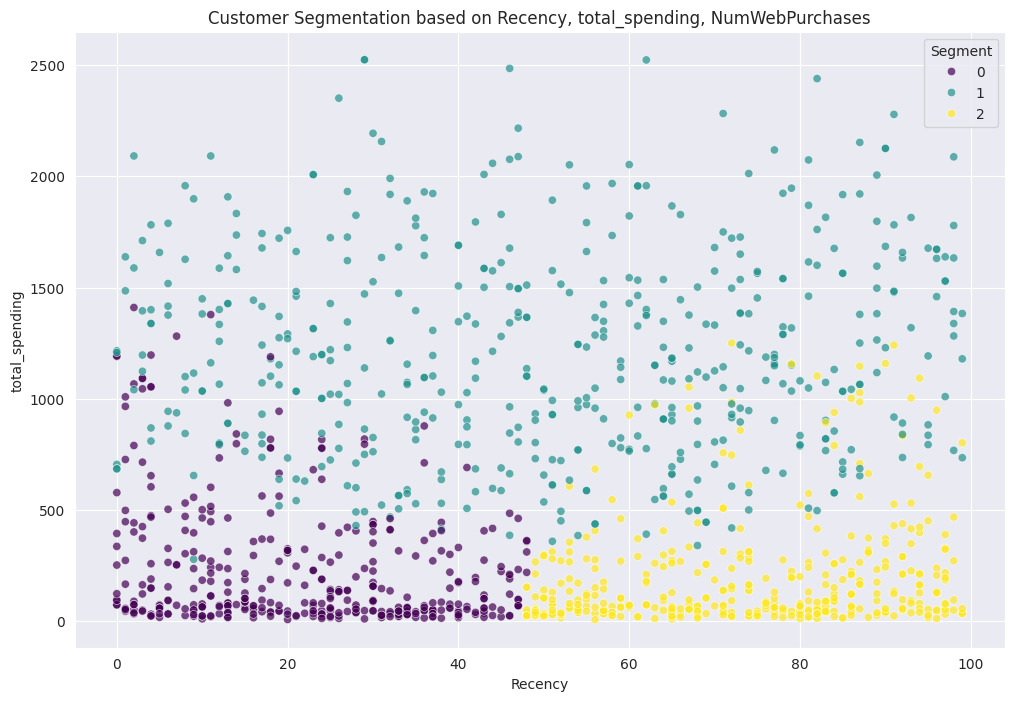

In [ ]:

# Based on the elbow curve, optimal number of clusters:
optimal_clusters = 3

# Perform KMeans clustering
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans_model.fit_predict(scaled_data)

# Visualize segmentation results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=features[0], y=features[1], hue='Segment', data=df, palette='viridis', alpha=0.7)
plt.title(f'Customer Segmentation based on {", ".join(features)}')
plt.show()

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

###Customer Demographic Analysis

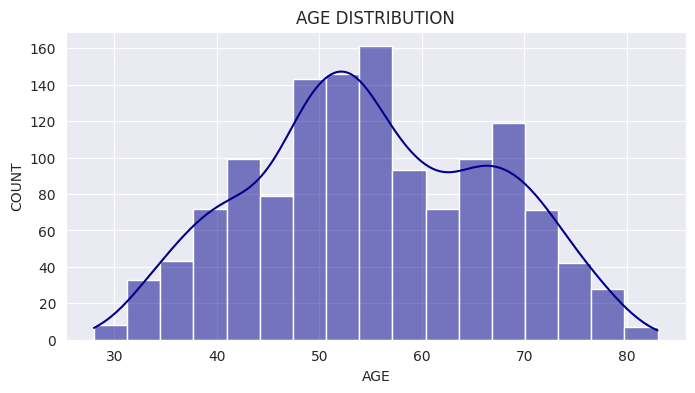

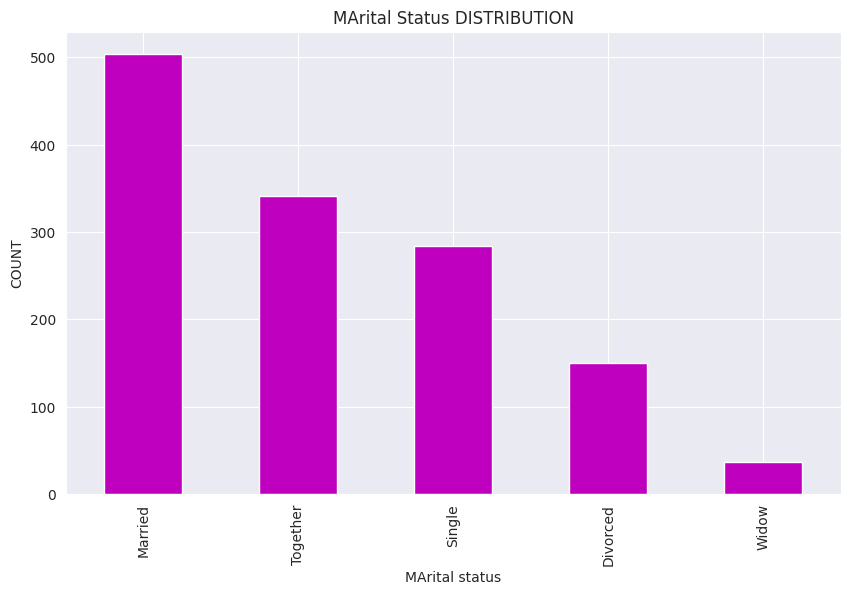

<ipython-input-95-9861f090bb39>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Education'],palette='cividis')


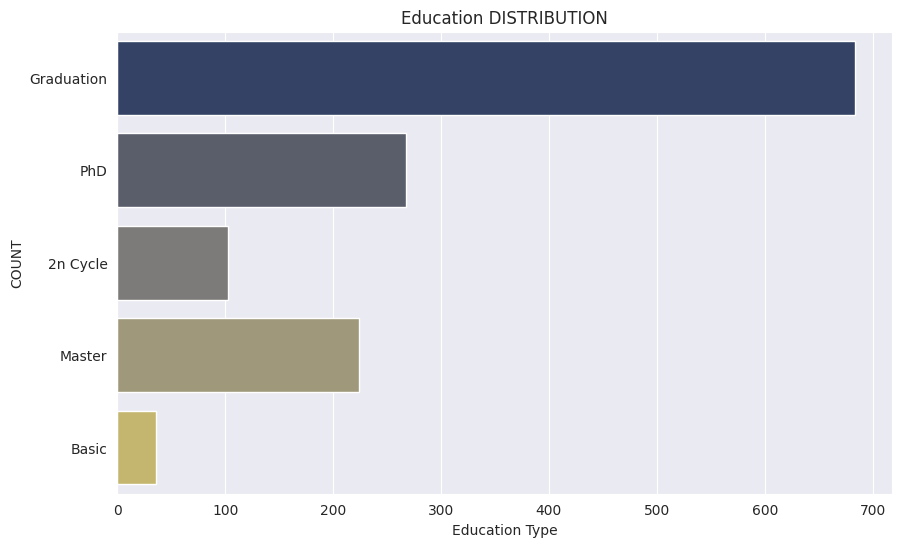

In [ ]:
#Analysis is based on AGE,MARITAL STATUS , EDUCATION

# 1. AGE DISTRIBUTION
plt.figure(figsize=[8,4])
sns.histplot(df['Age'],kde=True , color = 'darkblue')
plt.title("AGE DISTRIBUTION")
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.show()

#2. MARITAL STATUS
plt.figure(figsize=[10,6])
df['Marital_Status'].value_counts().plot(kind='bar',color='m')
plt.title("MArital Status DISTRIBUTION")
plt.xlabel("MArital status")
plt.ylabel("COUNT")
plt.show()

# 3. Education Distribution
plt.figure(figsize=[10,6])
sns.countplot(df['Education'],palette='cividis')
plt.title("Education DISTRIBUTION")
plt.xlabel("Education Type")
plt.ylabel("COUNT")
plt.show()


###Spending on Items Analysis

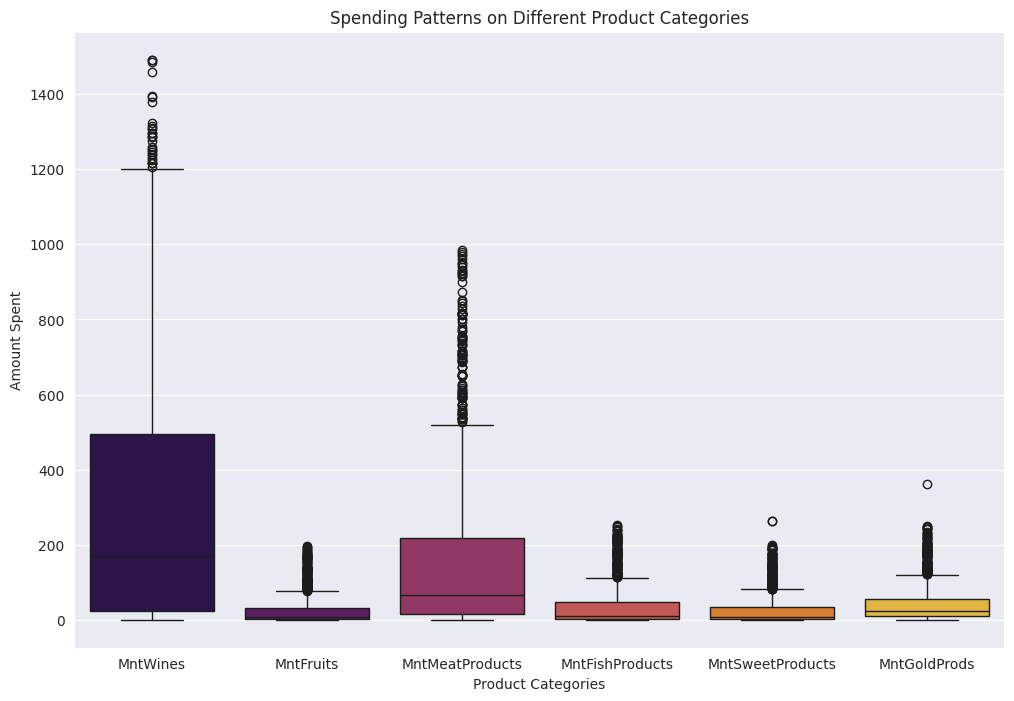

In [ ]:
# Spending Patterns on Different Product Categories
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[categories], palette='inferno')
plt.title('Spending Patterns on Different Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.show()


### Segmentation of the customer

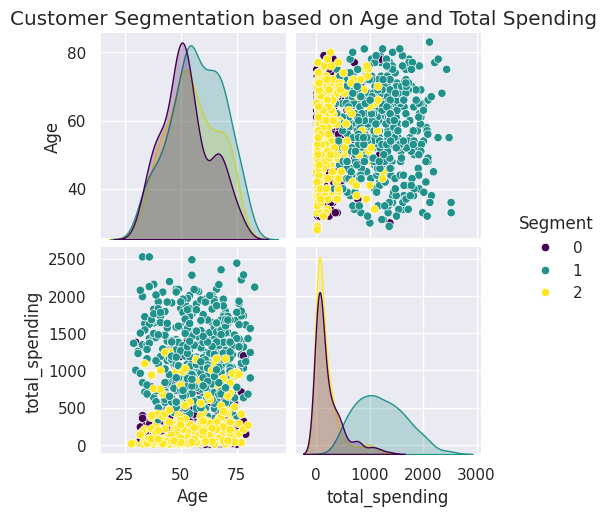

In [ ]:
sns.set(style="darkgrid")
sns.pairplot(df, hue="Segment", vars=['Age', 'total_spending'], palette='viridis')
plt.suptitle('Customer Segmentation based on Age and Total Spending', y=1.02)
plt.show()

###Based on the Analysis the insights and for those insights here are some recomendation below

**Age Distribution-**

Insight: The age distribution of customers exhibits a rough normal distribution.

Recommendation: Target marketing efforts based on age groups to tailor promotions and product recommendations more effectively. For example, promotions focused on younger age groups can be designed differently from those for older customers.

**MARITAL STATUS Distribution**

Insight: The majority of customers are married, while widow customers are the least represented.

Recommendation: Tailor advertising and promotions to appeal to married couples. Consider creating special promotions for couples or family-oriented products.

**Education Distribution-**

Insight: Graduates make up the largest portion, while basic education customers are the smallest group.

Recommendation: Design marketing strategies and campaigns that resonate with the majority of graduates. Consider creating targeted promotions or loyalty programs for customers with higher education levels.

**Spending Patterns on Different Product Categories-**

Insight: Customers spend the most on wines and the least on fruits.

Recommendation: Focus on promoting Meat-wine-related products, as they have a higher demand. Consider introducing new fruit-related products or creating promotions to boost sales in this category advising people the benifit of eating it .

**Customer Segmentation based on Age and Total Spending-**

Insight: The scatter plot shows segments based on age and total spending, but the clusters are not well-defined.

Recommendation: Further analyze and explore different combinations of features for segmentation. Conduct additional feature engineering to improve clustering results. Experiment with different clustering algorithms or consider a different approach for customer segmentation.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍